In [10]:
from tensorflow.keras.datasets import fashion_mnist
     
import numpy as np


In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
     

In [6]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 75s 50ms/step - loss: 1.1284 - accuracy: 0.8482 - val_loss: 0.3266 - val_accuracy: 0.8842
Epoch 2/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2854 - accuracy: 0.8976 - val_loss: 0.3268 - val_accuracy: 0.8888
Epoch 3/5
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2504 - accuracy: 0.9076 - val_loss: 0.3481 - val_accuracy: 0.8831
Epoch 4/5
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2261 - accuracy: 0.9173 - val_loss: 0.3360 - val_accuracy: 0.8893
Epoch 5/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2096 - accuracy: 0.9225 - val_loss: 0.3496 - val_accuracy: 0.8973


In [12]:

loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.3554 - accuracy: 0.8923


In [12]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
     


In [20]:
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print(label)
        plt.show()
    return label

In [21]:

predictions = model.predict(test_x[:1])

1/1 [==============================] - 0s 40ms/step


9


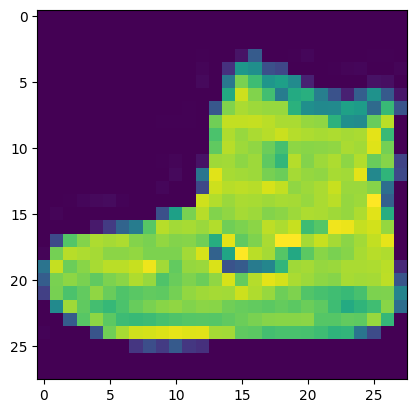

0


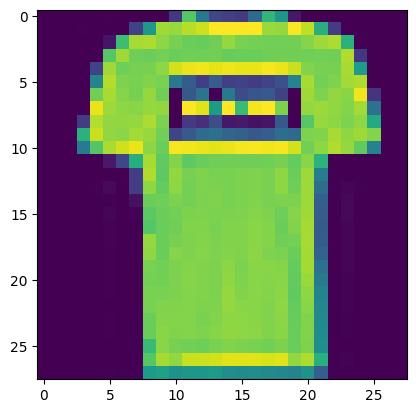

3


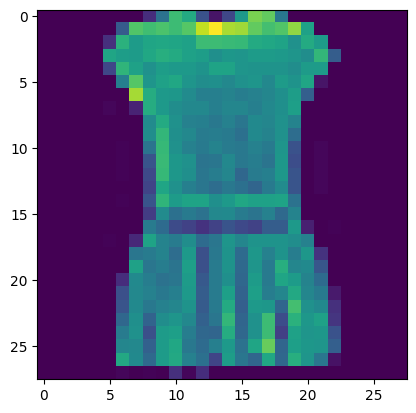

2


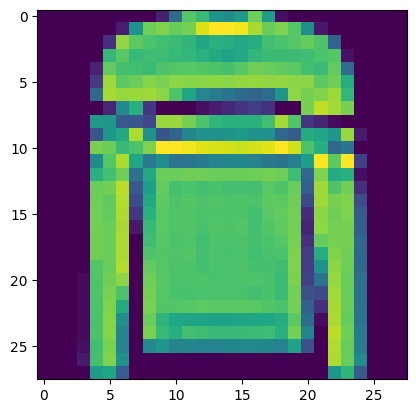

7


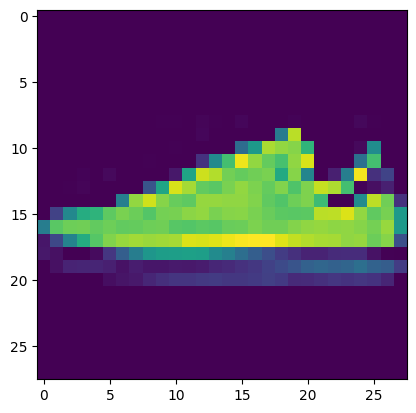

5


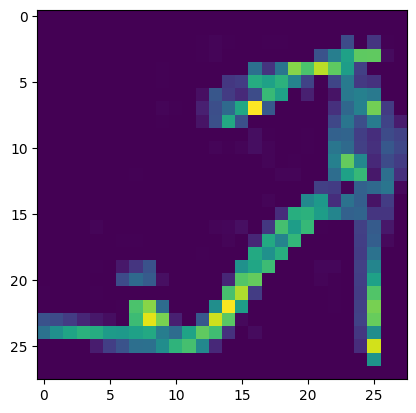

1


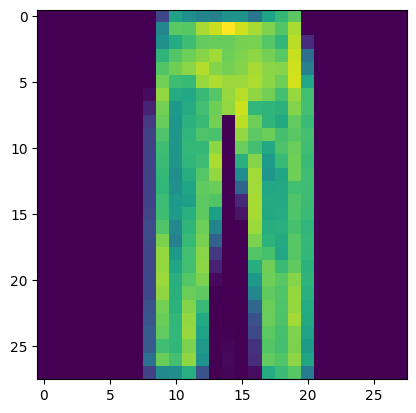

6


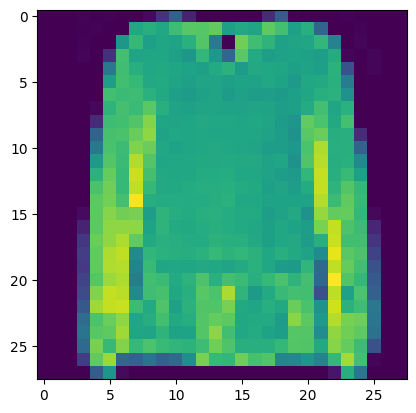

4


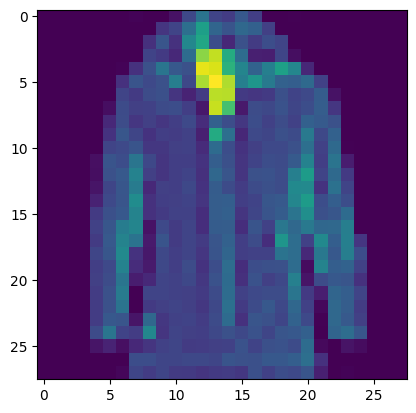

8


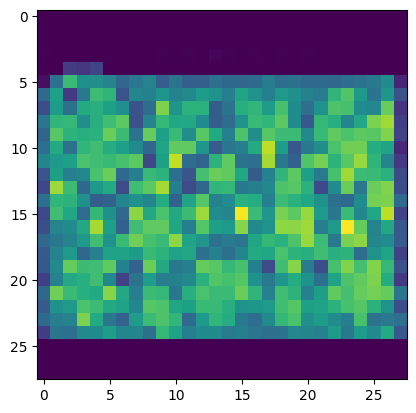

In [25]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [26]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(test_x[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

1/1 [==============================] - 0s 24ms/step
trouser


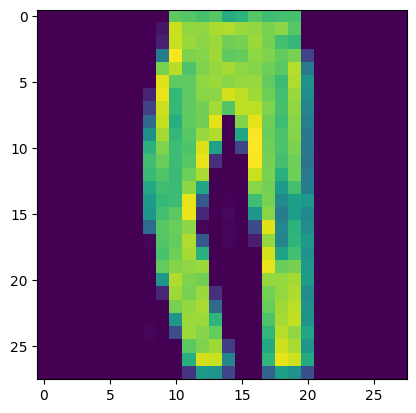

In [27]:
predict(5)

1/1 [==============================] - 0s 45ms/step
coat


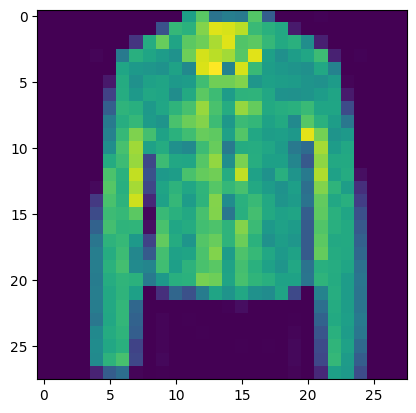

1/1 [==============================] - 0s 25ms/step
sandal


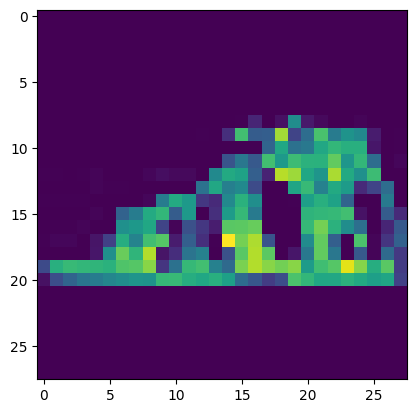

1/1 [==============================] - 0s 22ms/step
sandal


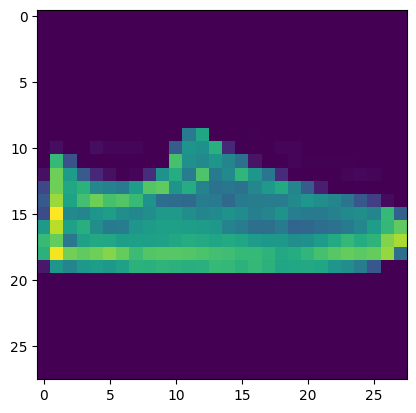

1/1 [==============================] - 0s 23ms/step
dress


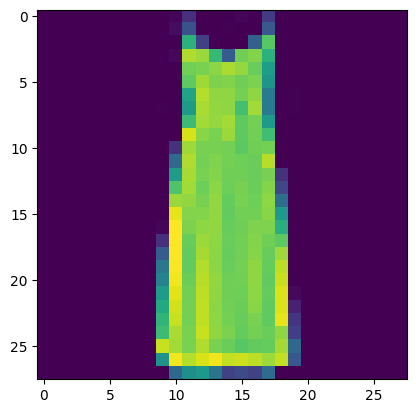

1/1 [==============================] - 0s 26ms/step
coat


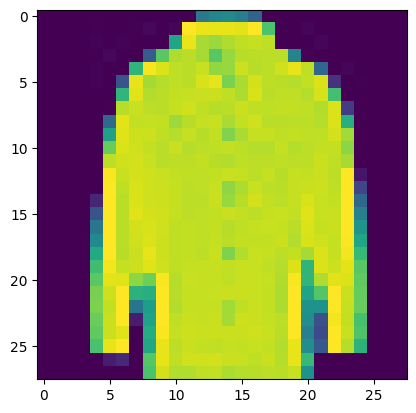

1/1 [==============================] - 0s 23ms/step
trouser


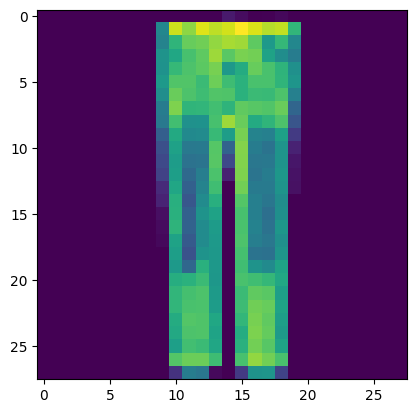

1/1 [==============================] - 0s 25ms/step
shirt


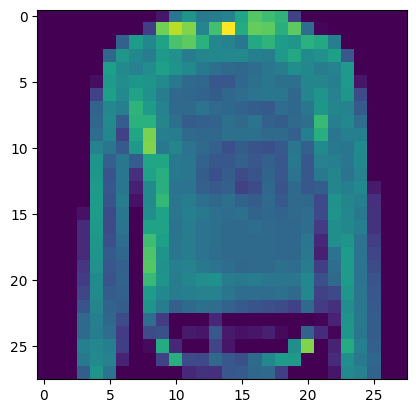

1/1 [==============================] - 0s 23ms/step
shirt


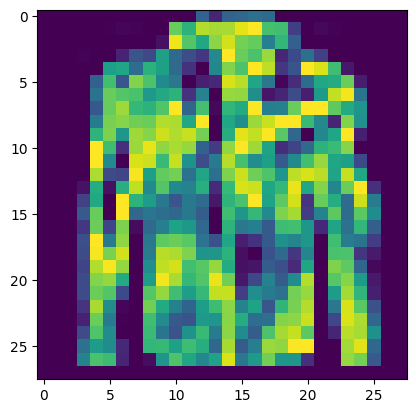

1/1 [==============================] - 0s 22ms/step
bag


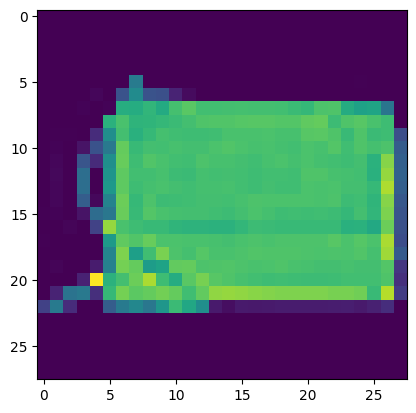

1/1 [==============================] - 0s 22ms/step
t_shirt


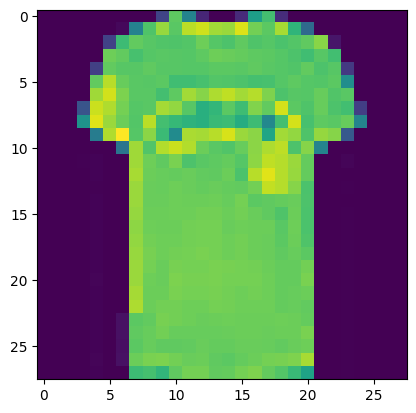

In [28]:
for i in range(10,20):
    predict(i)